# Dynamic Time Warping (DTW) Algorithm

---
# Introduction

Given two trajectory objects 𝑋1 ∈ ℝ(𝑁×𝑑), 𝑋2 ∈ ℝ(𝑀×𝑑), the dynamic time warping algorithm seeks to find the optimal alignment and produces a distance measure between the two trajectories. Recall this problem can be formulated into a dynamic problem (DP) as:


<img src = 'Figure1.jpg'>


where 𝐷̃ is the pointwise distance for 𝑋1 and 𝑋2 and 𝛾(𝑖,𝑗) is the cumulative distance at grid (𝑖,𝑗). The dynamic time warping distance can therefore be obtained by 𝛾(𝑁,𝑀) and the best alignment can be found by back tracing the 𝛾 matrix.

In this project, we will go through the following steps:
- Create the class object DTW for finding the DTW distance between two sequences. Run our implementation on three pairs of trajectories (𝑋1,𝑋2); (𝑌1,𝑌2); (𝑍1,𝑍2). We will use Euclidean (p-2 Minkowski) distance to construct the pointwise distance matrix. We DO NOT use any off-the-shelf implementations.
- Create the back_trace() function to find the optimal alignment between sequences and visualize your alignment results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---
# Implementation of the DTW class

In [2]:
class DTW:
    
    def __init__(self, X, Y):
        """
        X and Y are two trajectory objects
        The shape of X is (nx, m)
        The shape of Y is (ny, m)
        """
        self.X = np.asarray(X)
        self.Y = np.asarray(Y)
        self.nx = self.X.shape[0]   # Nx
        self.ny = self.Y.shape[0]   # Ny
        self.m = self.X.shape[1]   # M
    
    
    
    def _pointwise_distance(self):
        self.pt_dist = np.zeros((self.nx, self.ny))
        """
        We calculate the pointwise distance matrix self.pt_dist
        """
        for i in range(0,self.nx):
            for j in range(0,self.ny):
                d_i_j = 0
                for k in range(0,self.m):
                    d_i_j += (self.X[i][k] - self.Y[j][k])**2
                d_i_j = np.sqrt(d_i_j)
                self.pt_dist[i][j] = d_i_j
        
                
            
    def dynamic_programming(self):
        self._pointwise_distance()
        self.gamma = np.zeros((self.nx, self.ny))
        """
        We finish the dynamic programming problem to calculate the self.gamma matrix.
        """
        # Fill gamma[0][0]
        self.gamma[0][0] = self.pt_dist[0][0]
        
        # For each i, fill gamma[i][0] (first column of the matrix gamma)
        for i in range(1,self.nx):
            self.gamma[i][0] = self.pt_dist[i][0] + self.gamma[i-1][0]
            
        # For each j, fill gamma[0][j] (first row of the matrix gamma)
        for j in range(1,self.ny):
            self.gamma[0][j] = self.pt_dist[0][j] + self.gamma[0][j-1]
        
        # Fill the matrix gamma with the formula
        for i in range(1,self.nx):
            for j in range(1,self.ny):
                self.gamma[i][j] = self.pt_dist[i][j] + min(self.gamma[i-1][j-1],self.gamma[i-1][j],
                                                            self.gamma[i][j-1])
        
    
    
    def dtw_distance(self):
        """
        We return the last element of the gamma matrix
        """
        self.dynamic_programming()
        return self.gamma[-1][-1]

    
    
    def back_track(self):
        """
        We return the best alignment
        """
        self.dtw_distance()
        plt.figure(figsize=(20,10))
        
        # Plot X and Y
        plt.plot(self.X[:,0],self.X[:,1],'b',marker='o', label = 'X');
        plt.plot(self.Y[:,0],self.Y[:,1],'g',marker='o', label = 'Y');
        
        # Retrieve the alignments
        gamma_i_j = self.gamma[-1][-1]
        i = self.nx - 1
        j = self.ny - 1
        Point_X = [i]
        Point_Y = [j]
        
        # Look at the optimal path to retrieve gamma00
        while gamma_i_j != self.gamma[0][0]:
            gamma_i_j = min(self.gamma[i][j-1], self.gamma[i-1][j], self.gamma[i-1][j-1])
            coord = np.where(self.gamma == gamma_i_j)
            i = coord[0][0]
            j = coord[1][0]
            Point_X.append(i)
            Point_Y.append(j)
        
        # Print the alignments
        for k in range(0,len(Point_X)):
            a = [ self.X[Point_X[k]][0], self.Y[Point_Y[k]][0] ]
            b = [ self.X[Point_X[k]][1], self.Y[Point_Y[k]][1] ]
            plt.plot(a, b,'r--');
        
        plt.legend()
        
        return Point_X, Point_Y

---
# Run those code blocks to calculate DTW distances

### Example 1:

In [3]:
X_1 = np.array([[0,0], [1,1], [2,3], [3,2], [4,3], [5,7], [9,10], [11,13], [12,15]])
X_2 = np.array([[0,-1], [1,-0.5], [2,0.7], [3,1], [5,1], [6,9], [5,10], [4,7], [5,3.5],[8,10],[8,11], [11,11]])
dtw_X = DTW(X_1, X_2)
print(dtw_X.dtw_distance())
dtw_X = DTW(X_2, X_1)
print(dtw_X.dtw_distance())

26.309455142990338
26.309455142990338


### Example 2:

In [4]:
Y_1 = [[0,0],[4,3], [5,7], [9,10], [11,13], [12,15]]
Y_2 = [[0,-1]]
dtw_Y = DTW(Y_1, Y_2)
print(dtw_Y.dtw_distance())
dtw_Y = DTW(Y_2, Y_1)
print(dtw_Y.dtw_distance())

68.10799959986574
68.10799959986574


### Example 3:

In [5]:
Z_1 = [[0,0],[1,1],[2,3],[3,2],[4,3]]
Z_2 = [[0,-1],[1,-1],[2,1],[3,0]]
dtw_Z = DTW(Z_1, Z_2)
print(dtw_Z.dtw_distance())
dtw_Z = DTW(Z_2, Z_1)
print(dtw_Z.dtw_distance())

9.576491222541474
9.576491222541474


# Back Track Visualization

### Example 1:

([8, 7, 6, 6, 5, 5, 5, 5, 4, 3, 2, 1, 0], [11, 11, 10, 9, 8, 7, 6, 5, 3, 3, 2, 1, 0])


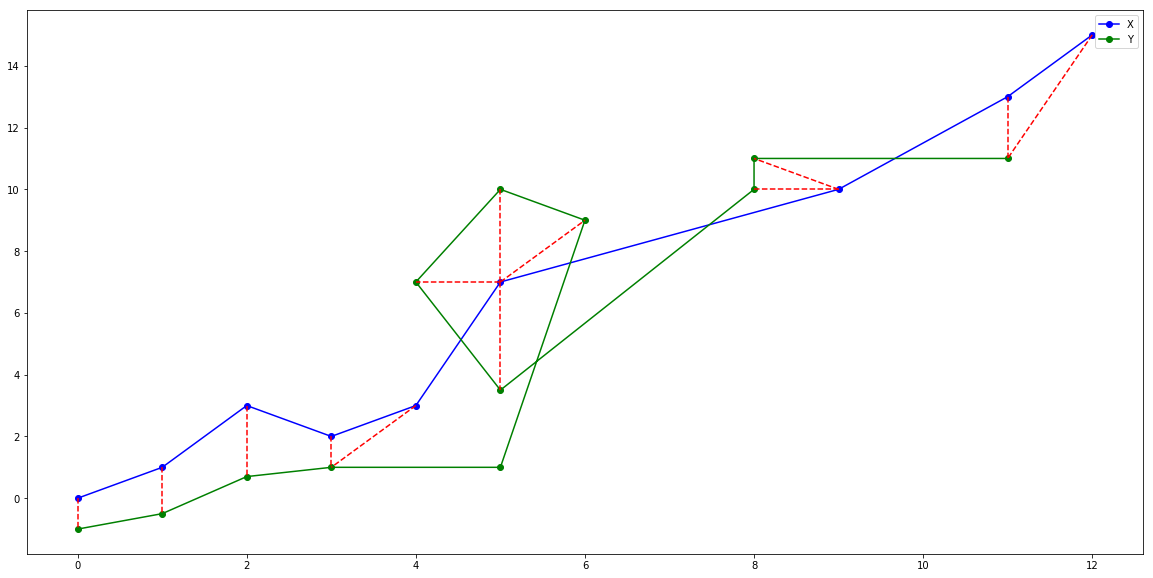

In [6]:
X_1 = np.array([[0,0], [1,1], [2,3], [3,2], [4,3], [5,7], [9,10], [11,13], [12,15]])
X_2 = np.array([[0,-1], [1,-0.5], [2,0.7], [3,1], [5,1], [6,9], [5,10], [4,7], [5,3.5],[8,10],[8,11], [11,11]])
dtw_X = DTW(X_1, X_2)
print(dtw_X.back_track())

### Example 2:

([5, 4, 3, 2, 1, 0], [0, 0, 0, 0, 0, 0])


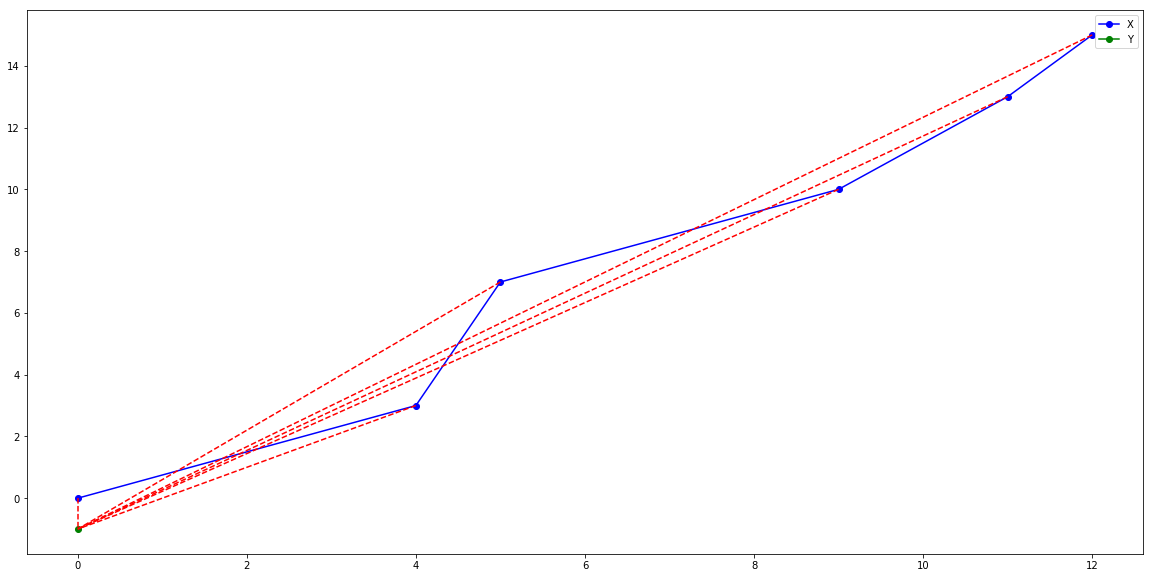

In [7]:
Y_1 = [[0,0],[4,3], [5,7], [9,10], [11,13], [12,15]]
Y_2 = [[0,-1]]
dtw_Y = DTW(Y_1, Y_2)
print(dtw_Y.back_track())

### Example 3:

([4, 3, 2, 1, 0], [3, 2, 2, 1, 0])


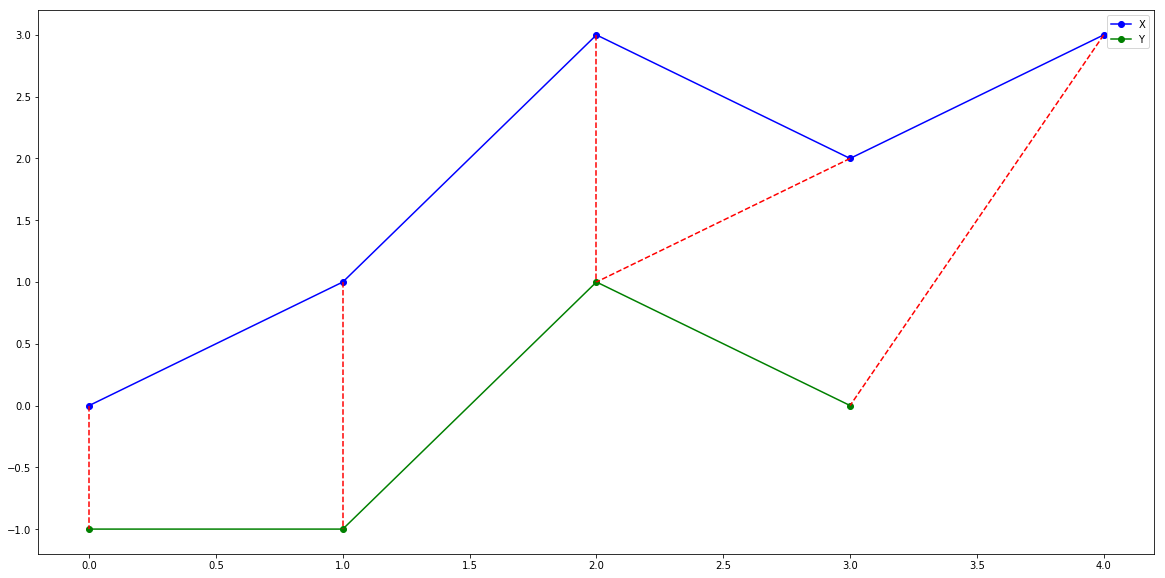

In [8]:
Z_1 = [[0,0],[1,1],[2,3],[3,2],[4,3]]
Z_2 = [[0,-1],[1,-1],[2,1],[3,0]]
dtw_Z = DTW(Z_1, Z_2)
print(dtw_Z.back_track())